In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_dir = "../data"

In [56]:
dfs = [
    (
        "Llama 2 7B 4bit vript",
        pd.read_pickle(f"{data_dir}/full/multiling_results_1818_llama-2-7b_4bit_rephrase_vript.pkl"),
    ),
]

In [61]:
llama_language_percentages = {
    "en": 0.897,
    "de": 0.17,
    "es": 0.13,
    "fr": 0.16,
    "it": 0.11,
    "ko": 0.06,
    "pt": 0.09,
    "ru": 0.13,
    "zh": 0.13,
}

In [62]:
def normalized_rephrases_gradients(row):
    grads = row["rephrased_gradients"]
    rephrase_lengths = row["rephrased_prompt_lengths"]
    return [g / l if l else 0 for g, l in zip(grads, rephrase_lengths)]


for _, df in dfs:
    df["language_share"] = df["language"].map(llama_language_percentages)

    df["prompt_gradient_normalized"] = df.apply(
        lambda row: (
            row["prompt_gradient"] / row["prompt_length"]
            if row["prompt_length"] > 0
            else 0
        ),
        axis=1,
    )
    df["rephrased_gradient_mean"] = df["rephrased_gradients"].apply(
        lambda x: np.mean(x)
    )

    df["rephrased_gradient_normalized_mean"] = df.apply(
        lambda row: np.mean(normalized_rephrases_gradients(row)), axis=1
    )

    df["log_prompt_gradient"] = df["prompt_gradient"].apply(
        lambda x: np.log(x) if x > 0 else 0
    )
    df["log_rephrased_gradient_mean"] = df["rephrased_gradient_mean"].apply(
        lambda x: np.log(x) if x > 0 else 0
    )
    df["log_rephrased_gradient_std"] = df["rephrased_gradient_std"].apply(
        lambda x: np.log(x) if x > 0 else 0
    )

    bins = 25


    df["prompt_gradient"] = df["prompt_gradient"].replace(
        [np.inf, -np.inf], np.nan
    )
    df["prompt_gradient_bins"] = pd.cut(
        df["prompt_gradient"], bins=bins, labels=False
    )

    df["rephrased_gradient_mean"] = df["rephrased_gradient_mean"].replace(
        [np.inf, -np.inf], np.nan
    )
    df["rephrased_gradient_mean_bins"] = pd.cut(
        df["rephrased_gradient_mean"], bins=bins, labels=False
    )

    df["rephrased_gradient_std"] = df["rephrased_gradient_std"].replace(
        [np.inf, -np.inf], np.nan
    )
    df["rephrased_gradient_std_bins"] = pd.cut(
        df["rephrased_gradient_std"], bins=bins, labels=False
    )

    df["prompt_gradient_normalized"] = df["prompt_gradient_normalized"].replace(
        [np.inf, -np.inf], np.nan
    )
    df["prompt_gradient_normalized_bins"] = pd.cut(
        df["prompt_gradient_normalized"], bins=bins, labels=False
    )

    df["rephrased_gradient_normalized_mean"] = df["rephrased_gradient_normalized_mean"].replace(
        [np.inf, -np.inf], np.nan
    )
    df["rephrased_gradient_normalized_mean_bins"] = pd.cut(
        df["rephrased_gradient_normalized_mean"], bins=bins, labels=False
    )

    df["log_prompt_gradient"] = df["log_prompt_gradient"].replace(
        [np.inf, -np.inf], np.nan
    )
    df["log_prompt_gradient_bins"] = pd.cut(
        df["log_prompt_gradient"], bins=bins, labels=False
    )

    df["log_rephrased_gradient_mean"] = df["log_rephrased_gradient_mean"].replace(
        [np.inf, -np.inf], np.nan
    )
    df["log_rephrased_gradient_mean_bins"] = pd.cut(
        df["log_rephrased_gradient_mean"], bins=bins, labels=False
    )

    df["log_rephrased_gradient_std"] = df["log_rephrased_gradient_std"].replace(
        [np.inf, -np.inf], np.nan
    )
    df["log_rephrased_gradient_std_bins"] = pd.cut(
        df["log_rephrased_gradient_std"], bins=bins, labels=False
    )

In [63]:
dfs[0][1]

,prompt,prompt_length,language,prompt_gradient,rephrased_prompts,rephrased_prompt_lengths,rephrased_gradients,rephrased_gradient_std,prompt_gradient_normalized,rephrased_gradient_mean,...,log_rephrased_gradient_std,prompt_gradient_bins,rephrased_gradient_mean_bins,rephrased_gradient_std_bins,prompt_gradient_normalized_bins,rephrased_gradient_normalized_mean_bins,log_prompt_gradient_bins,log_rephrased_gradient_mean_bins,log_rephrased_gradient_std_bins,language_share
0,The video appears to be an animated scene feat...,269,en,6.520891,[The video showcases an animated scene with tw...,"[261, 266, 268]","[6.440154552459717, 6.308426380157471, 6.18615...",0.127028,0.024241,6.311579,...,-2.063348,23,20,4,20,19,23,22,10,0.897
1,The video features an animated character resem...,257,en,6.307679,"[In the video, there's a cartoonish character ...","[265, 264, 245]","[6.36429500579834, 6.137204647064209, 6.807019...",0.340643,0.024543,6.436173,...,-1.076920,22,21,18,20,20,22,22,21,0.897
2,The video features a single animated character...,237,en,6.799893,[The video showcases a lone animated character...,"[242, 237, 244]","[7.11019229888916, 7.118228912353516, 6.898614...",0.124539,0.028692,7.042345,...,-2.083134,24,24,4,24,24,24,24,9,0.897
3,"Das Video zeigt verschiedene Szenen, die sich ...",348,de,5.172551,[In dem Video werden unterschiedliche Szenen p...,"[355, 361, 361]","[5.324009418487549, 5.157934188842773, 5.10954...",0.112485,0.014864,5.197162,...,-2.184932,15,14,3,11,10,17,16,8,0.170
4,Das Video präsentiert eine Abfolge von statisc...,296,de,5.974622,[Das Video zeigt eine Reihe von statischen Bil...,"[297, 304, 295]","[6.080212116241455, 6.26781702041626, 6.146799...",0.095109,0.020185,6.164943,...,-2.352728,19,19,2,16,16,21,21,6,0.170
5,Das Video scheint eine Cosplay-Demonstration z...,302,de,5.947190,[Das Video scheint eine Darbietung im Cosplayb...,"[286, 292, 308]","[6.101263999938965, 5.9898481369018555, 5.6152...",0.254606,0.019693,5.902121,...,-1.368038,19,18,13,15,15,21,20,18,0.170
6,El video muestra una escena en un aula donde v...,365,es,5.558920,[El video presenta un aula donde varios jóvene...,"[370, 385, 375]","[5.356444835662842, 5.597010135650635, 5.24018...",0.181988,0.015230,5.397878,...,-1.703817,17,15,8,11,10,19,17,14,0.130
7,Los fotogramas muestran sucesivamente planos g...,323,es,5.652297,[Las imágenes presentan una serie de planos am...,"[319, 325, 336]","[5.831099510192871, 5.574551105499268, 5.29699...",0.267123,0.017499,5.567547,...,-1.320046,18,16,13,13,12,20,18,19,0.130
8,El video presenta una serie de tomas que sugie...,303,es,5.398145,[El video muestra una serie de imágenes que ev...,"[300, 287, 289]","[5.488701820373535, 5.785122871398926, 6.35186...",0.438581,0.017816,5.875231,...,-0.824210,16,18,24,14,15,18,20,24,0.130
9,"Dans la séquence vidéo, la caméra adopte princ...",376,fr,4.981725,"[Dans cette vidéo, la caméra adopte essentiell...","[370, 341, 353]","[4.638373374938965, 5.208585739135742, 4.90657...",0.285273,0.013249,4.917844,...,-1.254308,13,12,15,9,9,16,15,19,0.160


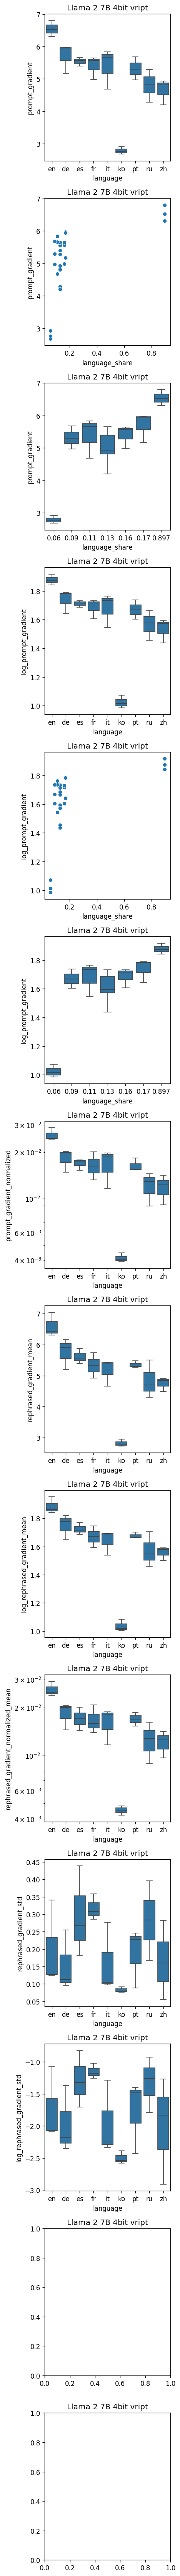

In [66]:
plt.rcParams["figure.dpi"] = 120
plot_size = 4

plt_width = len(dfs)
plt_height = 14

fig, axs = plt.subplots(
    plt_height,
    plt_width,
    figsize=(plt_width * plot_size, plt_height * plot_size),
    squeeze=False,
)

for i, (name, df) in enumerate(dfs):
    j = 0

    sns.boxplot(data=df, x="language", y="prompt_gradient", ax=axs[j][i])
    j += 1

    sns.scatterplot(data=df, x="language_share", y="prompt_gradient", ax=axs[j][i])
    j += 1

    sns.boxplot(data=df, x="language_share", y="prompt_gradient", ax=axs[j][i])
    j += 1

    sns.boxplot(data=df, x="language", y="log_prompt_gradient", ax=axs[j][i])
    j += 1

    sns.scatterplot(data=df, x="language_share", y="log_prompt_gradient", ax=axs[j][i])
    j += 1

    sns.boxplot(data=df, x="language_share", y="log_prompt_gradient", ax=axs[j][i])
    j += 1

    sns.boxplot(
        data=df,
        x="language",
        y="prompt_gradient_normalized",
        ax=axs[j][i],
        log_scale=True,
    )
    j += 1

    sns.boxplot(data=df, x="language", y="rephrased_gradient_mean", ax=axs[j][i])
    j += 1

    sns.boxplot(data=df, x="language", y="log_rephrased_gradient_mean", ax=axs[j][i])
    j += 1

    sns.boxplot(
        data=df,
        x="language",
        y="rephrased_gradient_normalized_mean",
        ax=axs[j][i],
        log_scale=True,
    )
    j += 1

    sns.boxplot(data=df, x="language", y="rephrased_gradient_std", ax=axs[j][i])
    j += 1

    sns.boxplot(data=df, x="language", y="log_rephrased_gradient_std", ax=axs[j][i])
    j += 1

    # sns.violinplot(data=df, x="language", y="prompt_gradient", ax=axs[j][i])
    # j += 1

    # sns.violinplot(data=df, x="language", y="rephrased_gradient_mean", ax=axs[j][i])
    # j += 1

    # sns.violinplot(data=df, x="language", y="rephrased_gradient_std", ax=axs[j][i])
    # j += 1

    # sns.violinplot(
    #     data=df, x="language", y="prompt_gradient_normalized", ax=axs[j][i]
    # )
    # j += 1

    # sns.violinplot(
    #     data=df, x="language", y="rephrased_gradient_normalized_mean", ax=axs[j][i]
    # )
    # j += 1

    for ax in axs.T[i]:
        ax.set_title(name)


plt.tight_layout()

In [ ]:
for name, df in dfs:
    true_gradients = df[df["language"] == True]["prompt_gradient"]
    false_gradients = df[df["language"] == False]["prompt_gradient"]

    t_stat, p_value = ttest_ind(true_gradients, false_gradients, equal_var=False)

    print(f"{name:<30} T-statistic: {t_stat:>12.4f}, P-value: {p_value}")

Llama-AWQ Truthful Rephrase    T-statistic:      -0.6723, P-value: 0.5016268827460724
Llama-AWQ Truthful Synonym     T-statistic:      -3.9600, P-value: 8.160387054792087e-05
Llama-AWQ Truthful Random      T-statistic:      -1.3358, P-value: 0.18227042971473215


In [ ]:
for name, df in dfs:
    true_gradients = df[df["language"] == True]["prompt_gradient_normalized"]
    false_gradients = df[df["language"] == False]["prompt_gradient_normalized"]

    t_stat, p_value = ttest_ind(true_gradients, false_gradients, equal_var=False)

    print(f"{name:<30} T-statistic: {t_stat:>12.4f}, P-value: {p_value}")

Llama-AWQ Truthful Rephrase    T-statistic:       0.5333, P-value: 0.5942262223359223
Llama-AWQ Truthful Synonym     T-statistic:      -2.0118, P-value: 0.044667312522440945
Llama-AWQ Truthful Random      T-statistic:      -1.9932, P-value: 0.04657253628718191
